# Графы

Задание графа через библиотеку networkx

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph(name="words") 
G.add_node(1)
G.add_nodes_from([2, 3, 4, 'a'])

G.add_edge(1, 2)
G.add_edges_from([(3, 2),(1, 3),(2, 4)])

Получение информации о графе

In [2]:
G.nodes

NodeView((1, 2, 3, 4, 'a'))

In [3]:
G.edges

EdgeView([(1, 2), (1, 3), (2, 3), (2, 4)])

Подсчет количества компонент связности

In [4]:
for component in nx.connected_components(G):
    print(component)

{1, 2, 3, 4}
{'a'}


Получение степени вершин

In [5]:
G.degree(1)

2

In [6]:
nx.degree(G)

DegreeView({1: 2, 2: 3, 3: 2, 4: 1, 'a': 0})

0. Расположить вершины графа в порядке убывания их степеней

In [7]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[(2, 3), (1, 2), (3, 2), (4, 1), ('a', 0)]

Визуализация графа

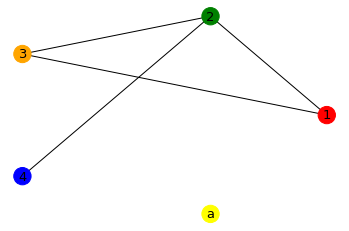

In [8]:
pos=nx.circular_layout(G)

nx.draw_networkx_nodes(G, pos, node_color=['red', 'green', 'orange', 'blue', 'yellow'])
nx.draw_networkx_labels(G, pos, font_size=13, font_color='black')
nx.draw_networkx_edges(G, pos)

plt.axis('off')
plt.show()

### Лестница слов

<img src="wordladder-chameleon.png" width="400">

1. Построить граф, вершинами которого являются слова из файла https://www-cs-faculty.stanford.edu/~knuth/sgb-words.txt. Ребро проводится между словами, которые отличаются одной буквой (motel - hotel).

In [9]:
words = open("sgb-words.txt", "r").read().split("\n")
words.remove("")

In [10]:
len(words)

5757

In [11]:
%%time

import networkx as nx

def words_graph(words_lst):
    edges = []
    for i, left_word in enumerate(words_lst[:-1]):
        for right_word in words_lst[i + 1:]:
            difference = 0
            for left_letter, right_letter in zip(list(left_word), list(right_word)):
                if left_letter != right_letter:
                    difference += 1
                if difference > 1:
                    break
            else:
                edges.append((left_word, right_word))
    G = nx.Graph(name="words")
    G.add_nodes_from(words_lst)
    G.add_edges_from(edges)
    return G

G = words_graph(words)
print(f"The graph has {nx.number_of_nodes(G)} nodes with {nx.number_of_edges(G)} edges")
print(f"{nx.number_connected_components(G)} connected components")

The graph has 5757 nodes with 14135 edges
853 connected components
Wall time: 9.09 s


2. Написать алгоритм нахождения кратчайшего пути от одного слова к другому. Вывести цепочку слов. <br>
Использовать алгоритм нахождения кратчайшего пути из библиотеки networkx.<br>
(*) Использовать алгоритм нахождения кратчайшего пути, написанный самостоятельно

In [12]:
def shortest_path(graph, source, target):
    try:
        path = nx.algorithms.shortest_paths.generic.shortest_path(G, source, target)
    except:
        print(f"No path from {source} to {target} found.")
    else:
        print(f"The shortest path from {source} to {target} is:")
        print("\n".join(path))

In [13]:
shortest_path(G, "chaos", "order")

The shortest path from chaos to order is:
chaos
chaps
chops
coops
corps
cores
codes
coder
cider
eider
elder
older
order


In [14]:
shortest_path(G, "nodes", "graph")

The shortest path from nodes to graph is:
nodes
lodes
lores
lords
loads
goads
grads
grade
grape
graph


In [15]:
shortest_path(G, "pound", "marks")

No path from pound to marks found.
